In [1]:
import pandas as pd
data=pd.read_csv("Fraud_Analysis_Dataset.csv")

In [2]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


In [4]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,11142.000000,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,11142.000000
mean,8.717645,2.131915e+05,9.241173e+05,8.249576e+05,8.883541e+05,1.103211e+06,0.102495
std,16.067479,7.600650e+05,2.143004e+06,2.089894e+06,2.601376e+06,2.982447e+06,0.303312
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,4.946618e+03,4.270000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,1.676126e+04,2.816950e+04,4.420605e+03,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,1.543366e+05,3.040855e+05,1.114126e+05,2.711555e+05,3.186374e+05,0.000000
max,95.000000,1.000000e+07,1.990000e+07,1.300000e+07,3.300000e+07,3.460000e+07,1.000000


In [5]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [6]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [7]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])

In [10]:
data = data.drop(['nameOrig', 'nameDest'], axis=1)

In [60]:
with open('label_encoder.pkl', 'wb') as le_file:
    pk.dump(le, le_file)

In [12]:
X = data.drop('isFraud', axis=1)
y = data['isFraud']

In [50]:
X.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest'],
      dtype='object')

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
X_train.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
540,46,1,71372.00,71372.00,0.00,613464.04,684836.04
7237,6,3,17104.60,5515.36,0.00,0.00,0.00
4957,3,3,997.13,27576.89,26579.75,0.00,0.00
8852,7,1,474349.67,0.00,0.00,487482.74,1289357.76
1146,1,3,7107.77,183195.00,176087.23,0.00,0.00


In [17]:
X_test.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
6117,5,3,3046.60,11626.00,8579.40,0.00,0.00
483,41,1,2885466.96,2885466.96,0.00,28131.01,3268477.05
8413,7,1,429539.78,471.23,0.00,10400000.00,14900000.00
9902,7,1,86050.93,0.00,0.00,89834.00,175884.93
9413,7,3,7596.59,69632.00,62035.41,0.00,0.00


In [18]:
y_train.head()

540     1
7237    0
4957    0
8852    0
1146    0
Name: isFraud, dtype: int64

In [19]:
y_test.head()

6117    0
483     1
8413    0
9902    0
9413    0
Name: isFraud, dtype: int64

In [15]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(7799, 7) (3343, 7) (7799,) (3343,)


AdaBoost Accuracy:  0.996111277295842
AdaBoost Confusion Matrix: 
 [[2996    0]
 [  13  334]]


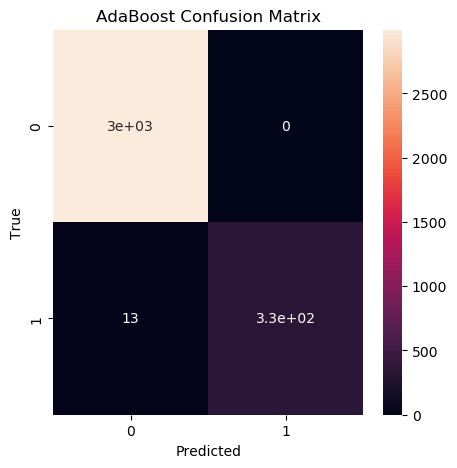

In [30]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the base model and AdaBoost
base_model = DecisionTreeClassifier(max_depth=1)
adaboost_model = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)

# Train the model
adaboost_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_adaboost = adaboost_model.predict(X_test)

print("AdaBoost Accuracy: ", accuracy_score(y_test, y_pred_adaboost))
print("AdaBoost Confusion Matrix: \n", confusion_matrix(y_test, y_pred_adaboost))

# Plot confusion matrix
plt.figure(figsize=(5,5))
plt.title("AdaBoost Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_adaboost), annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Gradient Boosting Accuracy:  0.9958121447801376
Gradient Boosting Confusion Matrix: 
 [[2996    0]
 [  14  333]]


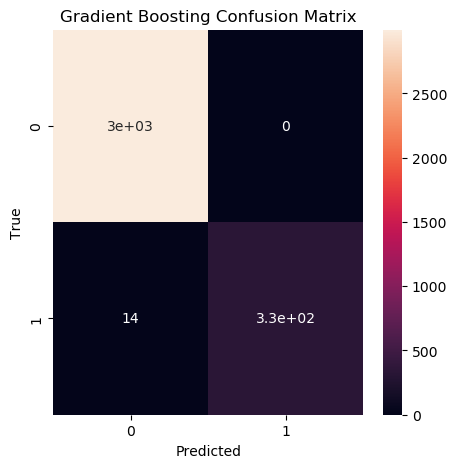

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting Accuracy: ", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Confusion Matrix: \n", confusion_matrix(y_test, y_pred_gb))

# Plot confusion matrix
plt.figure(figsize=(5,5))
plt.title("Gradient Boosting Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Stacking Accuracy:  0.9958121447801376
Stacking Confusion Matrix: 
 [[2996    0]
 [  14  333]]


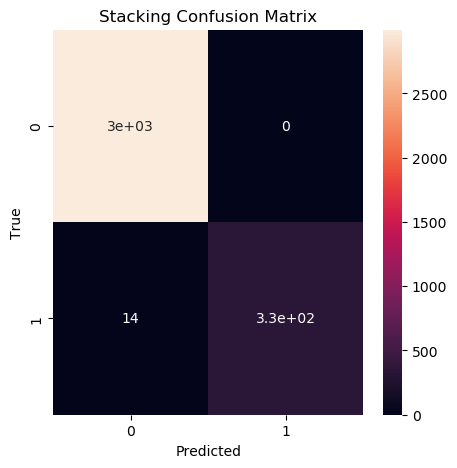

In [48]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Initialize base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

# Initialize the meta-model
meta_model = LogisticRegression()

# Initialize and train the Stacking model
ensemble_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
ensemble_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_stack = ensemble_model.predict(X_test)

print("Stacking Accuracy: ", accuracy_score(y_test, y_pred_stack))
print("Stacking Confusion Matrix: \n", confusion_matrix(y_test, y_pred_stack))

# Plot confusion matrix
plt.figure(figsize=(5,5))
plt.title("Stacking Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_stack), annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

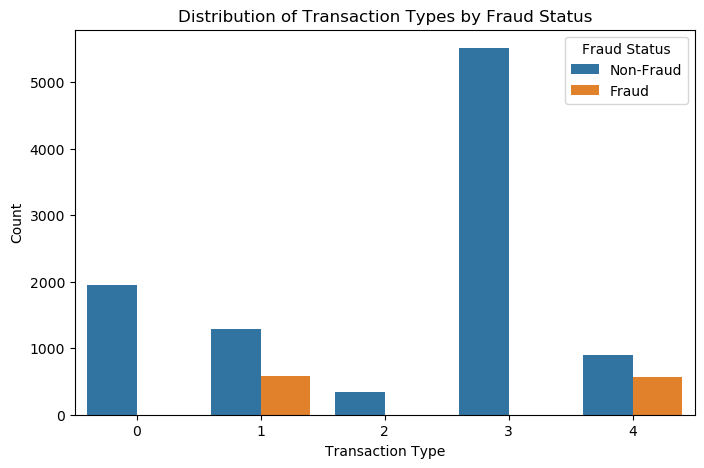

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='type', hue='isFraud')
plt.title('Distribution of Transaction Types by Fraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='Fraud Status', loc='upper right', labels=['Non-Fraud', 'Fraud'])
plt.show()

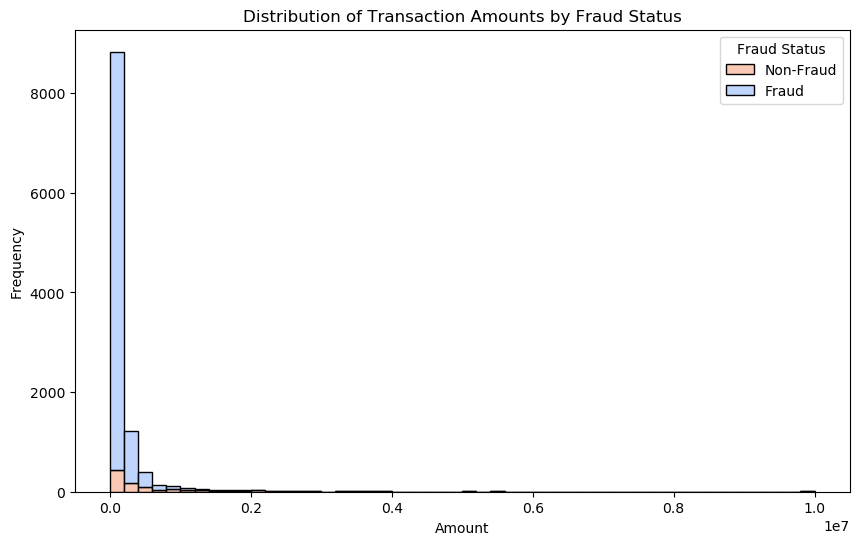

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='amount', hue='isFraud', multiple='stack', bins=50, palette='coolwarm')
plt.title('Distribution of Transaction Amounts by Fraud Status')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend(title='Fraud Status', loc='upper right', labels=['Non-Fraud', 'Fraud'])
plt.show()

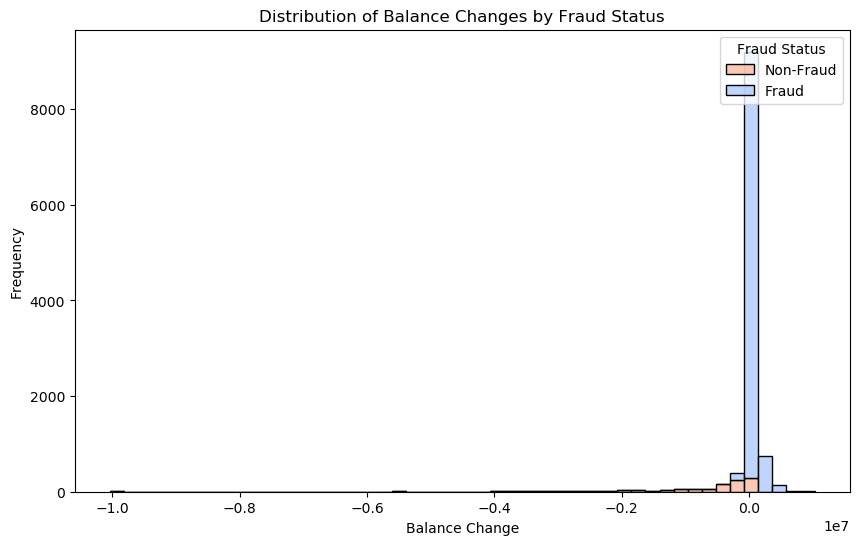

In [37]:
data['balance_change'] = data['newbalanceOrig'] - data['oldbalanceOrg']
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='balance_change', hue='isFraud', multiple='stack', bins=50, palette='coolwarm')
plt.title('Distribution of Balance Changes by Fraud Status')
plt.xlabel('Balance Change')
plt.ylabel('Frequency')
plt.legend(title='Fraud Status', loc='upper right', labels=['Non-Fraud', 'Fraud'])
plt.show()

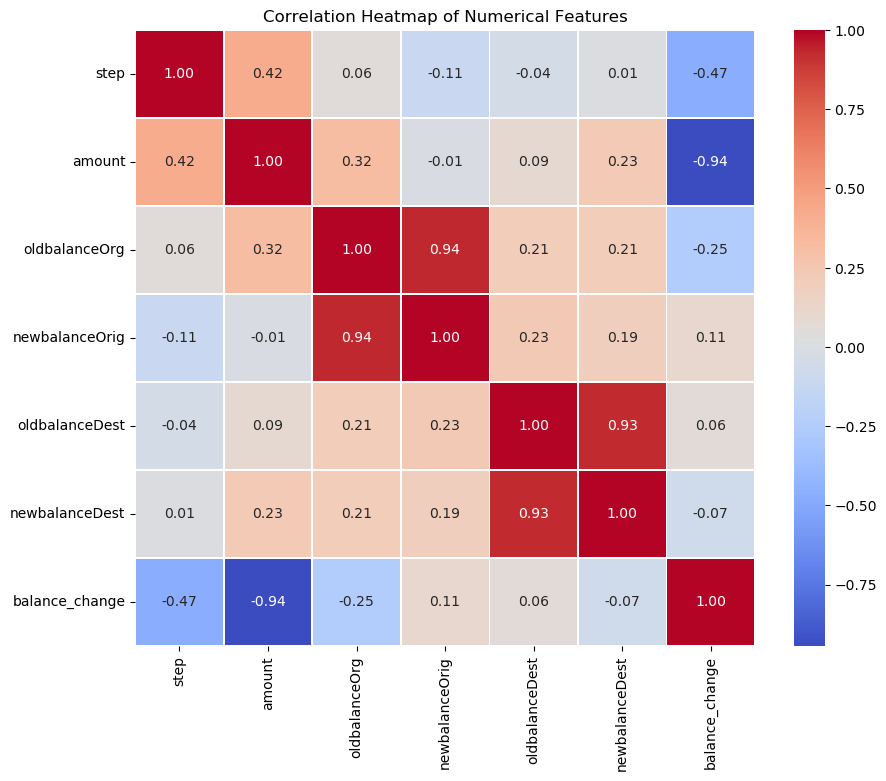

In [38]:
plt.figure(figsize=(10, 8))
corr = data[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'balance_change']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

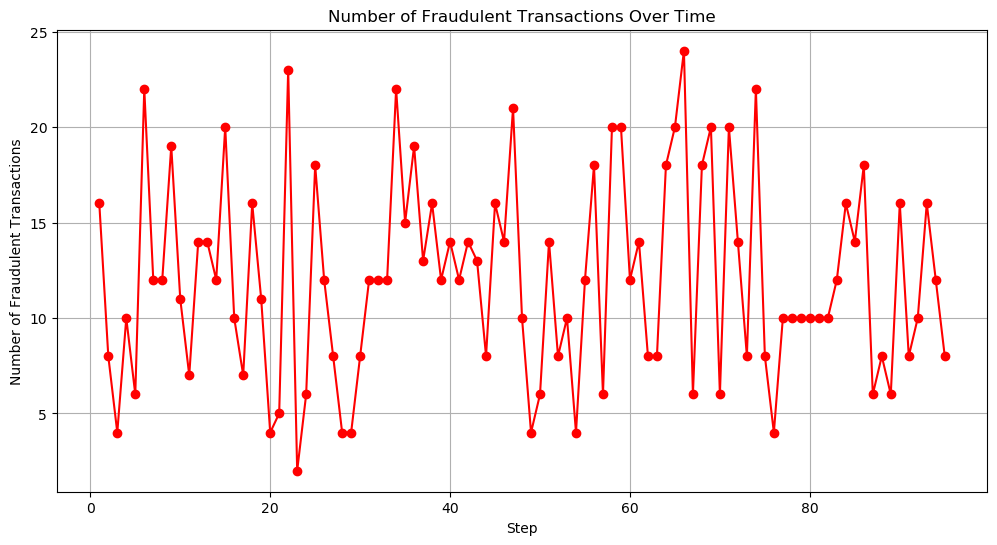

In [39]:
plt.figure(figsize=(12, 6))
fraud_per_step = data[data['isFraud'] == 1].groupby('step').size()
plt.plot(fraud_per_step.index, fraud_per_step.values, marker='o', linestyle='-', color='r')
plt.title('Number of Fraudulent Transactions Over Time')
plt.xlabel('Step')
plt.ylabel('Number of Fraudulent Transactions')
plt.grid(True)
plt.show()

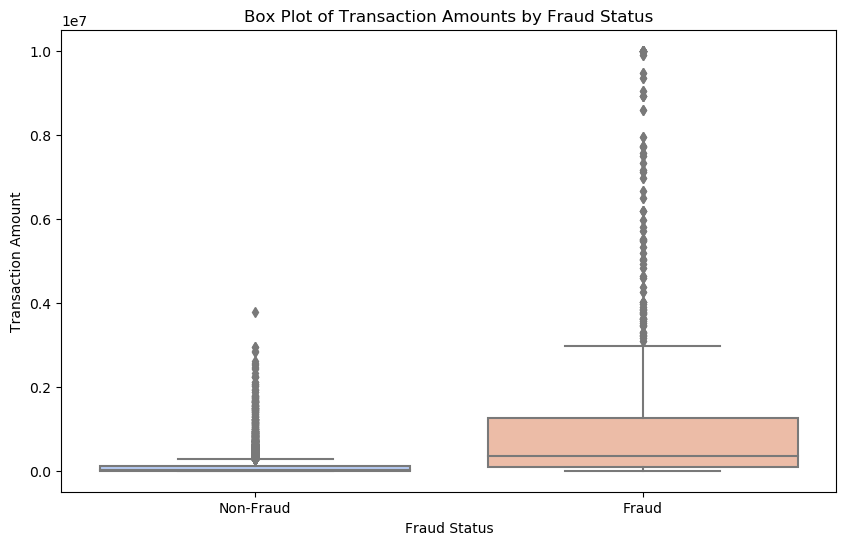

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='isFraud', y='amount', palette='coolwarm')
plt.title('Box Plot of Transaction Amounts by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Transaction Amount')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

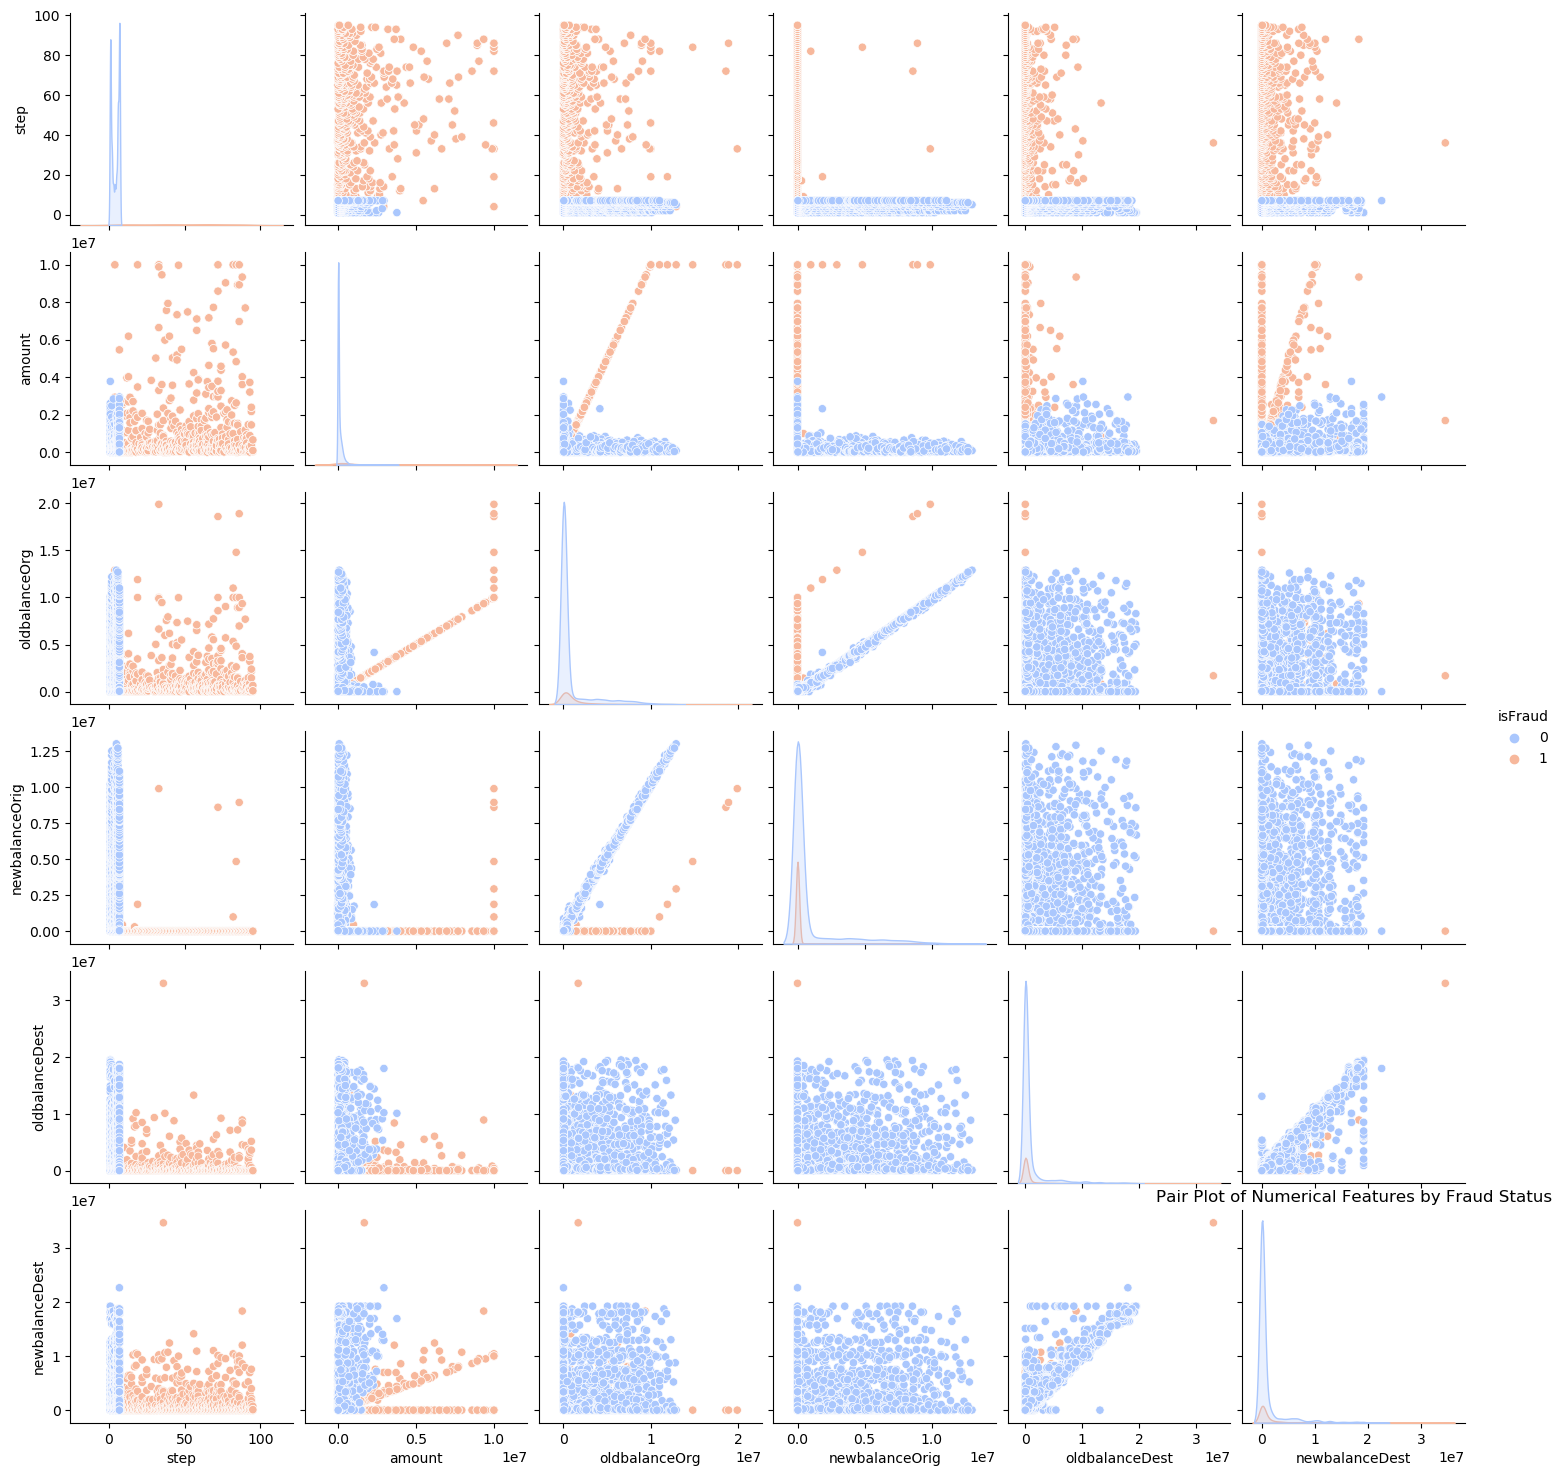

In [41]:
sns.pairplot(data[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']], hue='isFraud', palette='coolwarm')
plt.title('Pair Plot of Numerical Features by Fraud Status')
plt.show()

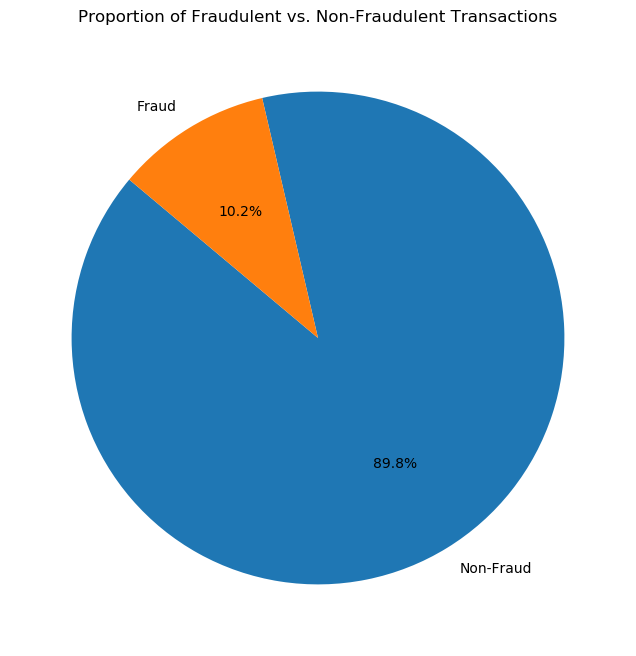

In [43]:
# Count the number of fraudulent and non-fraudulent transactions
fraud_counts = data['isFraud'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(fraud_counts, labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e'], startangle=140)
plt.title('Proportion of Fraudulent vs. Non-Fraudulent Transactions')
plt.show()

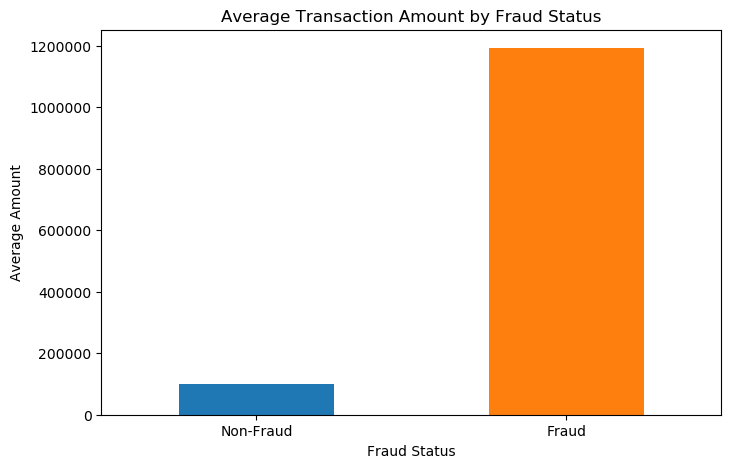

In [44]:
# Calculate average transaction amount by fraud status
avg_amount_by_fraud = data.groupby('isFraud')['amount'].mean()

# Plot bar graph
plt.figure(figsize=(8, 5))
avg_amount_by_fraud.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Average Transaction Amount by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Average Amount')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'], rotation=0)
plt.show()

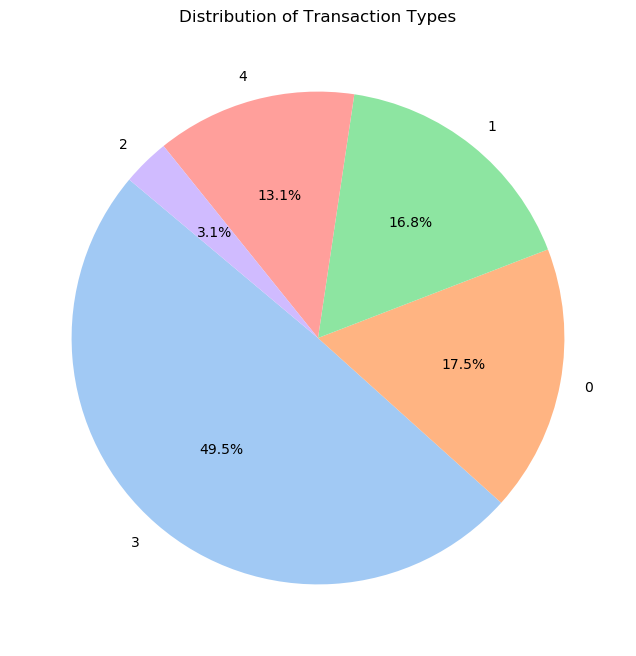

In [45]:
# Count the number of transactions by type
type_counts = data['type'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Distribution of Transaction Types')
plt.show()

In [51]:
import pickle as pk

with open("model.pkl",'wb') as file:
    pk.dump(ensemble_model,file)

In [52]:
with open("model.pkl",'rb') as f:
    model=pk.load(f)

In [53]:
input=[['1','0','2806','2806','0','26202','0']]

In [54]:
pred=model.predict(input)

C:\ProgramData\Anaconda\envs\cmp\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\ProgramData\Anaconda\envs\cmp\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [59]:
if pred==0:
    print("Non-fraud")
else:
    print("fraud")

Non-fraud
